
# Chronic Kidney Disease

In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

%matplotlib inline

In [2]:
dataset = pd.read_csv(r"C:\Desktop1\Shwetha V\RiskHealthBoard_Project\Kidney_data.csv")
dataset.head()

,bp,sg,al,su,rbc,pc,pcc,classification
0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,ckd
1,50.0,1.020,4.0,0.0,NaN,normal,notpresent,ckd
2,80.0,1.010,2.0,3.0,normal,normal,notpresent,ckd
3,70.0,1.005,4.0,0.0,normal,abnormal,present,ckd
4,80.0,1.010,2.0,0.0,normal,normal,notpresent,ckd


In [3]:
# Shape of dataset:
dataset.shape

(400, 8)

In [4]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum()

bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
classification      0
dtype: int64

In [5]:
# Description:
dataset.describe()

,bp,sg,al,su
count,388.000000,353.000000,354.000000,351.000000
mean,76.469072,1.017408,1.016949,0.450142
std,13.683637,0.005717,1.352679,1.099191
min,50.000000,1.005000,0.000000,0.000000
25%,70.000000,1.010000,0.000000,0.000000
50%,80.000000,1.020000,0.000000,0.000000
75%,80.000000,1.020000,2.000000,0.000000
max,180.000000,1.025000,5.000000,5.000000


In [6]:
# Datatypes:
dataset.dtypes

bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
classification     object
dtype: object

In [7]:
dataset.head()

,bp,sg,al,su,rbc,pc,pcc,classification
0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,ckd
1,50.0,1.020,4.0,0.0,NaN,normal,notpresent,ckd
2,80.0,1.010,2.0,3.0,normal,normal,notpresent,ckd
3,70.0,1.005,4.0,0.0,normal,abnormal,present,ckd
4,80.0,1.010,2.0,0.0,normal,normal,notpresent,ckd


### Replacing Categorical values with numbers:

#### 1. rbc

In [8]:
dataset['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [9]:
dataset['rbc'] = dataset['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

 2. pc

In [10]:
dataset['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [11]:
dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

#### 3. pcc

In [12]:
dataset['pcc'].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [13]:
dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent':0,'present':1})

In [14]:
dataset['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [15]:
dataset['classification'] = dataset['classification'].replace(to_replace={'ckd\t':'ckd'})

In [16]:
dataset["classification"] = [1 if i == "ckd" else 0 for i in dataset["classification"]]

In [17]:
dataset.head()

,bp,sg,al,su,rbc,pc,pcc,classification
0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,1
1,50.0,1.020,4.0,0.0,NaN,0.0,0.0,1
2,80.0,1.010,2.0,3.0,0.0,0.0,0.0,1
3,70.0,1.005,4.0,0.0,0.0,1.0,1.0,1
4,80.0,1.010,2.0,0.0,0.0,0.0,0.0,1


In [18]:
# Datatypes:
dataset.dtypes

bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
classification      int64
dtype: object

### Converting Object values into Numeric values:

In [19]:
# Datatypes:
dataset.dtypes

bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
classification      int64
dtype: object

In [20]:
# Description:
dataset.describe()

,bp,sg,al,su,rbc,pc,pcc,classification
count,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,400.000000
mean,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.625000
std,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum().sort_values(ascending=False)

rbc               152
pc                 65
su                 49
sg                 47
al                 46
bp                 12
pcc                 4
classification      0
dtype: int64

### Handling Null Values:

- There is Outliers present in our dataset so We fill NaN values with Median.

In [22]:
dataset.columns

Index(['bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'classification'], dtype='object')

In [23]:
features = ['bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc','classification']

In [24]:
for feature in features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].median())

In [25]:
dataset.isnull().any().sum()

0

### Heatmap

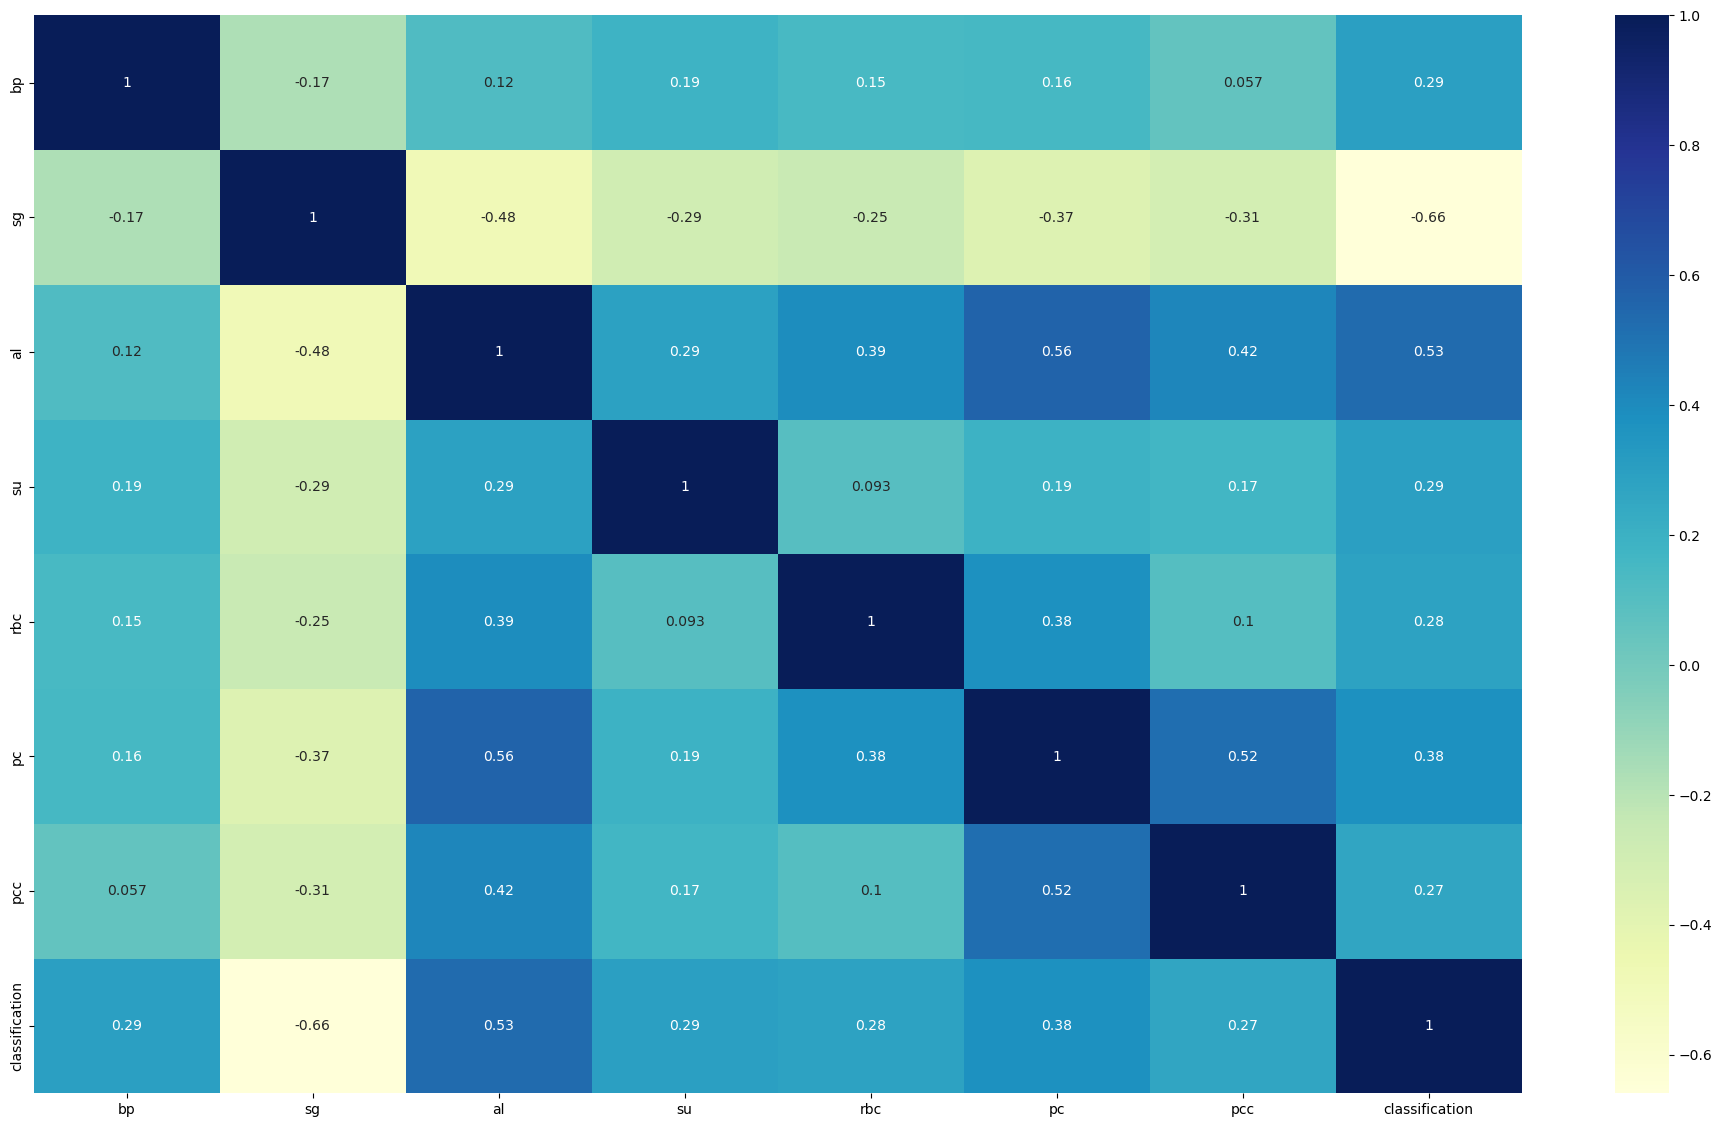

In [26]:
plt.figure(figsize=(24,14))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

- We clearly see that 'pcv' and 'hemo' feature has **85% multicollinearity** 
- So we remove one of the feature. i.e **pcv**

In [27]:
dataset.head()

,bp,sg,al,su,rbc,pc,pcc,classification
0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,1
1,50.0,1.020,4.0,0.0,0.0,0.0,0.0,1
2,80.0,1.010,2.0,3.0,0.0,0.0,0.0,1
3,70.0,1.005,4.0,0.0,0.0,1.0,1.0,1
4,80.0,1.010,2.0,0.0,0.0,0.0,0.0,1


C:\Users\Shwetha V\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classification', ylabel='count'>

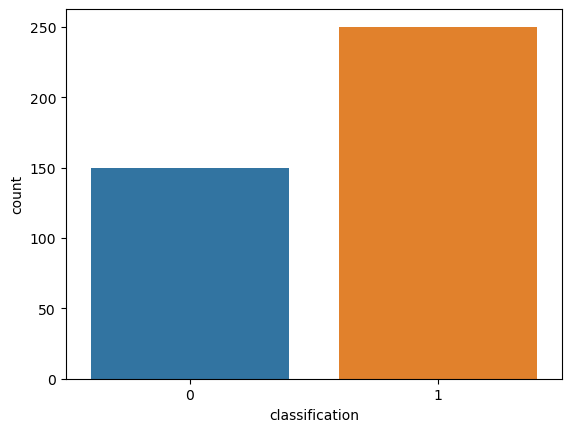

In [28]:
# Target feature:
sns.countplot(dataset['classification'])

In [29]:
y = dataset['classification'].values
X =dataset.drop('classification', axis=1).values

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.30, random_state=21)


In [30]:
# Testing Options
scoring = 'accuracy'

In [31]:
# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For CART Model:Mean accuracy is 0.914286 (Std accuracy is 0.045737)
For SVM Model:Mean accuracy is 0.610714 (Std accuracy is 0.095097)
For NB Model:Mean accuracy is 0.807143 (Std accuracy is 0.076931)
For KNN Model:Mean accuracy is 0.892857 (Std accuracy is 0.039123)


C:\Users\Shwetha V\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Shwetha V\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

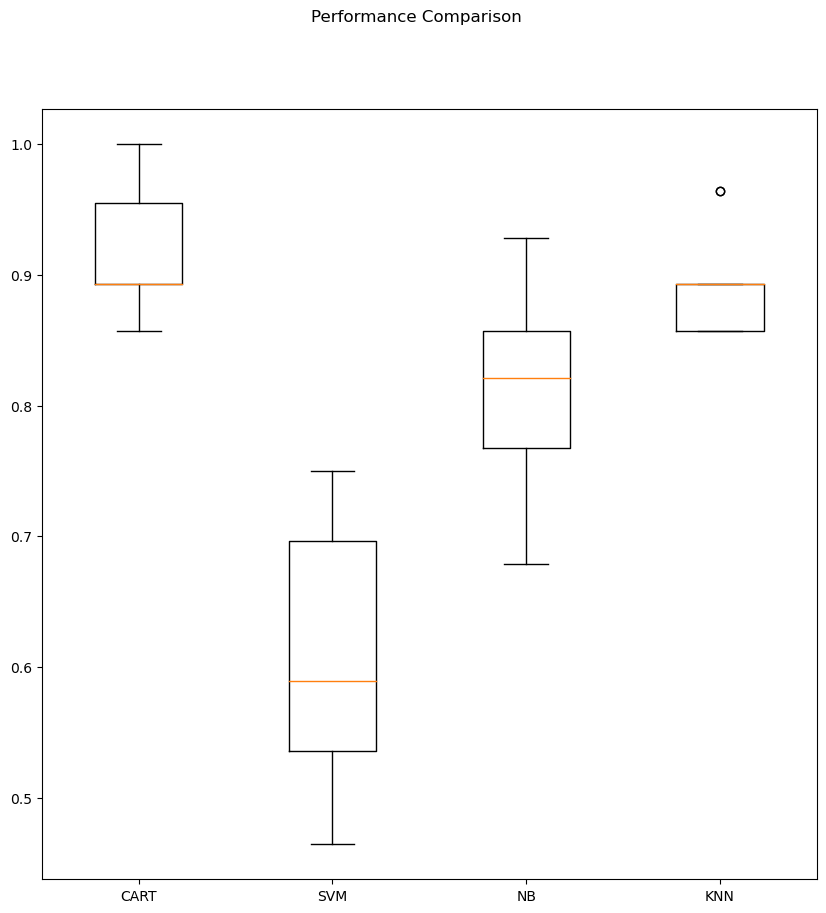

In [32]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [33]:
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(y_test, predictions))
    print("Classification report:\n",classification_report(y_test, predictions))


Model: CART
Accuracy score: 0.925
Classification report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        41
           1       1.00      0.89      0.94        79

    accuracy                           0.93       120
   macro avg       0.91      0.94      0.92       120
weighted avg       0.94      0.93      0.93       120


Model: SVM
Accuracy score: 0.6583333333333333
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.66      1.00      0.79        79

    accuracy                           0.66       120
   macro avg       0.33      0.50      0.40       120
weighted avg       0.43      0.66      0.52       120


Model: NB
Accuracy score: 0.7916666666666666
Classification report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77        41
           1       1.00      0.68    

C:\Users\Shwetha V\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shwetha V\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shwetha V\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shwetha V\anaconda3\lib\site-packa

In [35]:
cart= DecisionTreeClassifier()

cart.fit(X_train, y_train)
accuracy = cart.score(X_test, y_test)
print("Test Accuracy:",accuracy)

predict = cart.predict(X_test)
predict

Test Accuracy: 0.925


array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [36]:
import pickle
pickle.dump(cart, open('kidney_model.pkl','wb'))
model = pickle.load(open('kidney_model.pkl','rb'))